In [1]:
from printrun.printcore import printcore
from printrun import gcoder
import time
import pyvisa
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Connect to Devices

##### Scope

In [2]:
rm = pyvisa.ResourceManager()
rm.list_resources()
scope = rm.open_resource('USB0::0x1AB1::0x044D::DHO8A254404063::INSTR')
print(f'Scope: {scope.query('*IDN?')}')

Scope: RIGOL TECHNOLOGIES,DHO804,DHO8A254404063,00.01.01



##### 3D Printer

In [8]:
# Connect to printer
p = printcore("COM3", 115200)

## Set Up

##### Scope

In [4]:
scope.write(":TIM:SCAL 0.00001")  # Set timebase to 10 us/div
scope.write(":CHAN1:OFFS 0")
scope.write(":CHAN1:SCAL 0.5")    # Set CH1 voltage scale to 200mV/div
scope.write(":ACQ:TYPE AVER")
scope.write(":ACQ:AVER 4")
# scope.write(":TRIG:LEV 0.5")    # Set trigger level to 0.5V

13

##### 3D Printer

In [5]:
p.send("G91") # set to relative mode
p.send("G28") # Home
p.wait
p.send("G1 X118 Y68 Z280 F12000") # Measurement Starting Location

## Measurement Function

In [6]:
def measure_scope_vpp():
    measurements = np.array([float(scope.query(":MEAS:VPP? CHAN1")) for _ in range(5)])
    meas_avg = np.average(sorted(measurements)[2:])
    return meas_avg

## 3D Printer Movement and Data Acquisition

In [9]:
p.send("G28") # HOME

In [10]:
p.send("G91") # Relative mode

In [12]:
p.send("G1 X-10 Y-10 F12000") # Test Rel mode

In [55]:
p.send("G1 Z-160 F1000") # Move in Z direction

In [94]:
p.send("G90") # Absolute mode

In [54]:
p.send("G1 X150 Y100 Z440 F12000") # Starting location

In [13]:
# DEBUGGING
p.send("G1 X118 Y68 Z280 F12000") # Measurement Starting Location

In [15]:
# MOVE DOWN TO PUT TANK ON
p.send("G1 Z-100 F12000")

In [60]:
# Center Tx and Rx (find max signal)
p.send("G1 X1 F6000")

In [27]:
p.send("G1 Y-2 F6000")

In [40]:
p.send("G1 Z100 F12000")

In [162]:
# Move to starting point (x moves back by 32, y moves back by 32)
p.send("G1 X-50 Y-50 F6000")
p.wait

0

In [59]:
# DEBUG: Move Z back up to initial plane
p.send("G1 Z5 F1000")

In [39]:
p.send("G1 X-5 F12000")

In [57]:
p.send("G90")

In [ ]:
p.send("G1 X150 Y100 Z280 F12000")

In [ ]:
p.send("G1 X-3 Y F12000")

In [58]:
p.send("G1 Z130 F12000")

In [47]:
p.send("G1 Y-1 F12000")

In [34]:
p.send("G1 X-12 F12000")

In [53]:
z_planes = 2
y_points = 40
x_points = 40
x_range = 40 # mm
y_range = 40 # mm
x_movement = x_range / x_points 
y_movement = y_range / y_points
measurements = np.zeros((z_planes, y_points, x_points))
p.send(f'G1 X-{x_range/2} Y-{y_range/2} F12000')
time.sleep(2)
for i in tqdm(range(z_planes)): # Z
    for j in tqdm(range(y_points)): # Y 
        for k in tqdm(range(x_points)): # X
            # Measure here
            measurements[i,j,k] = measure_scope_vpp()
            p.send(f"G1 X{x_movement} F3000")
        # Measure last x point 
        ## measurements[z_planes - 1, j, x_points] = measure_scope_vpp()
        p.send(f"G1 X-{x_range} Y{y_movement} F3000")
        time.sleep(1)
    p.send(f"G1 Y-{y_range} Z10 F3000")
    time.sleep(5)
print(measurements)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

[[[0.32046667 0.36580333 0.31431    ... 0.38402333 0.38642333 0.38986333]
  [0.29309    0.29089    0.32864333 ... 0.38738    0.36146667 0.34166333]
  [0.26762333 0.31631    0.30222333 ... 0.32991    0.32833333 0.35262333]
  ...
  [0.21731333 0.18155667 0.24038    ... 0.06633333 0.05395567 0.04433333]
  [0.18522333 0.15335767 0.21622    ... 0.07415567 0.05157767 0.054111  ]
  [0.22135667 0.22582333 0.26311    ... 0.05293367 0.046289   0.04206633]]

 [[0.27882333 0.28193333 0.24044667 ... 0.3212     0.34582333 0.31155667]
  [0.26849    0.26377667 0.27133333 ... 0.34391    0.33093    0.31729   ]
  [0.25502333 0.23895667 0.28433667 ... 0.32653333 0.35322    0.2752    ]
  ...
  [0.22791333 0.26231    0.30306667 ... 0.038933   0.03977767 0.045489  ]
  [0.207979   0.23442    0.23562333 ... 0.043      0.04235567 0.048089  ]
  [0.196289   0.24033    0.18748767 ... 0.06704433 0.06082233 0.04735567]]]


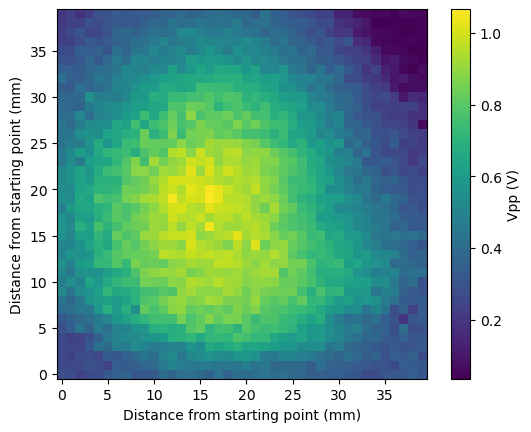

In [ ]:
# # Plot heatmap
# plt.imshow(measurements[0], cmap="viridis", interpolation="nearest", origin="lower")
# plt.imshow(measurements[1], cmap="viridis", interpolation="nearest", origin="lower")

# plt.xlabel("Distance from starting point (mm)")
# plt.ylabel("Distance from starting point (mm)")

# # Add colorbar
# plt.colorbar(label="Vpp (V)")

# # Show heatmap
# plt.show()

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot first heatmap
img1 = ax[0].imshow(measurements[0], cmap="viridis", interpolation="nearest", origin="lower")
ax[0].set_title("Heatmap 1")
ax[0].set_xlabel("Distance from starting point (mm)")
ax[0].set_ylabel("Distance from starting point (mm)")

# Plot second heatmap
img2 = ax[1].imshow(measurements[1], cmap="viridis", interpolation="nearest", origin="lower")
ax[1].set_title("Heatmap 2")
ax[1].set_xlabel("Distance from starting point (mm)")

# Add colorbars
fig.colorbar(img1, ax=ax[0], label="Vpp (V)")
fig.colorbar(img2, ax=ax[1], label="Vpp (V)")

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Save data
np.savetxt("3_3_25_no_object_0.csv", measurements[0], delimiter=",", fmt="%.2f")  # fmt controls number formatting
np.savetxt("3_3_25_no_object_1.csv", measurements[1], delimiter=",", fmt="%.2f")  # fmt controls number formatting